# (1) 製造三角函數訊號並去除高頻雜訊（40%）

產生一個時間向量 t，疊加三種不同頻率的正弦波(5、50、120)

In [6]:
import numpy as np
import matplotlib.pyplot as plt
# 時間向量
t = np.linspace(0, 1, 1000, endpoint=False)
# 原始訊號 = 低頻 + 中頻 + 高頻三角函數疊加
x = np.sin(2 * np.pi * 5 * t) + 0.5 * np.sin(2 * np.pi * 50 * t) + 0.2 * np.sin(2 * np.pi * 120 * t)

對 x 做快速傅立葉轉換 (FFT)：

In [7]:
X = np.fft.fft(x)
freqs = np.fft.fftfreq(len(t), d=(t[1] - t[0]))

移除高頻（如 > 30 Hz）：

In [8]:
# 過濾高頻 (>30 Hz)
X_filtered = X.copy()
X_filtered[np.abs(freqs) > 30] = 0
# 反傅立葉轉換還原訊號
x_filtered = np.fft.ifft(X_filtered)

繪圖比較原始與濾波後訊號

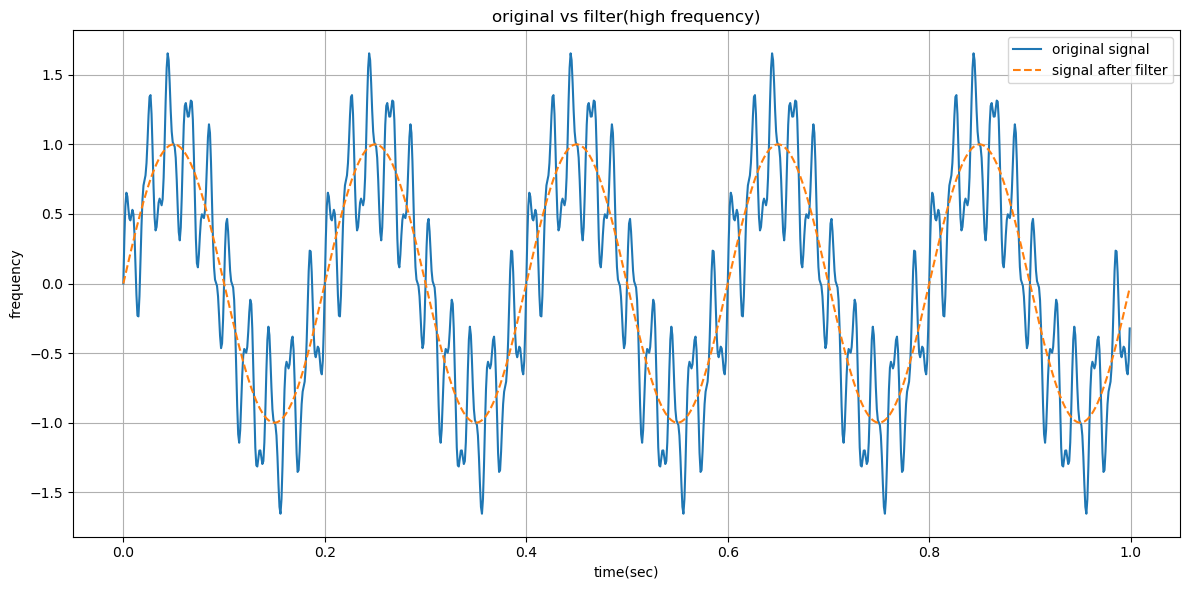

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(t, x, label='original signal')
plt.plot(t, x_filtered.real, label='signal after filter', linestyle='--')
plt.xlabel('time(sec)')
plt.ylabel('frequency')
plt.title('original vs filter(high frequency)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 自行匯入一音訊檔，對該音訊檔做(快速)傅立葉轉換，並畫出頻譜圖 (Spectrum) (10%)

匯入函數

In [49]:
from scipy.io import wavfile

匯入音訊檔

In [51]:
rate, data = wavfile.read("test.wav")

立體聲轉單聲道

In [52]:
if data.ndim > 1:
    data = data[:, 0]


正規化 + 去除 DC 分量

In [53]:
data = data.astype(np.float32)
data -= np.mean(data)
data /= np.max(np.abs(data))

 計算 FFT

In [54]:
spectrum = np.fft.fft(data)
freqs = np.fft.fftfreq(len(data), d=1/rate)

# 只取正頻率部分
half = len(freqs) // 2
spectrum_half = np.abs(spectrum[:half])
freqs_half = freqs[:half]

繪製頻譜圖（限制頻率在 0–2000 Hz）

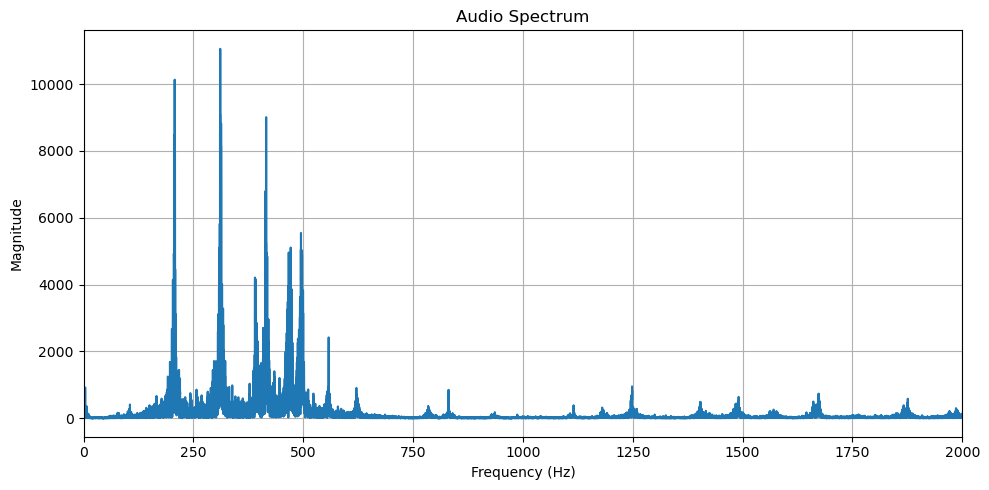

In [57]:
plt.figure(figsize=(10, 5))
plt.plot(freqs_half, spectrum_half)
plt.xlim(0, 2000)
plt.title("Audio Spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. 一維卷積與傅立葉轉換驗證（20% + 30%）

(1) 定義 x、h 並做卷積 (20%)

In [27]:
# 定義兩個一維訊號
x = np.array([1, 2, 3, 4])
h = np.array([1, 0, -1])
y_time = np.convolve(x, h)

繪圖顯示

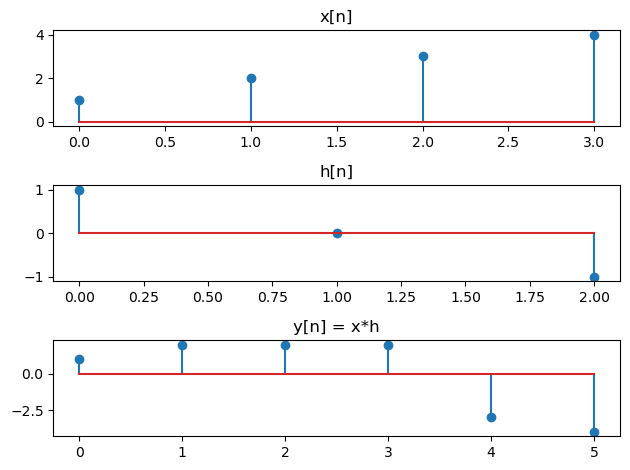

In [28]:
plt.subplot(3,1,1)
plt.stem(x)
plt.title('x[n]')
plt.subplot(3,1,2)
plt.stem(h)
plt.title('h[n]')
plt.subplot(3,1,3)
plt.stem(y_time)
plt.title('y[n] = x*h')
plt.tight_layout()
plt.show()


# (2) 驗證時域卷積 = 頻域相乘 (30%)

In [33]:
# 頻域相乘的結果
N = len(x) + len(h) - 1
X = np.fft.fft(x, n=N)
H = np.fft.fft(h, n=N)
Y_freq = X * H
y_freq = np.fft.ifft(Y_freq)
print("Time domain convolution:", y_time)
print("Freq domain multiplication result (real part):", np.real(y_ifft))

Time domain convolution: [ 1  2  2  2 -3 -4]
Freq domain multiplication result (real part): [ 1.  2.  2.  2. -3. -4.]


使用 np.allclose(y, y_ifft.real) 驗證相等性。

In [34]:
# 驗證兩者是否接近
are_close = np.allclose(y, y_ifft.real)

are_close, y, y_ifft.real

(True, array([ 1,  2,  2,  2, -3, -4]), array([ 1.,  2.,  2.,  2., -3., -4.]))

時域卷積和頻域乘積的對比

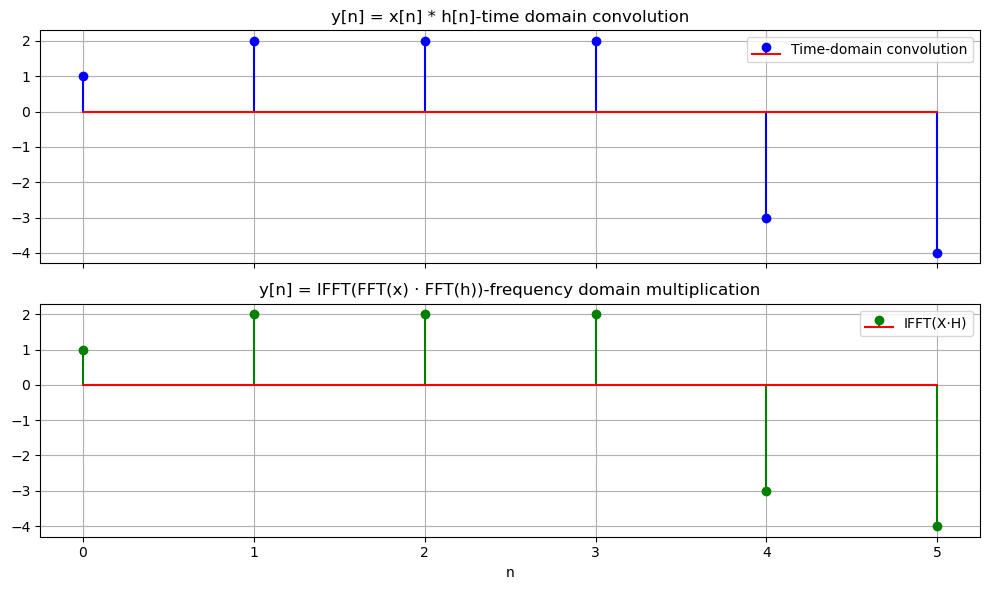

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(10, 6), sharex=True)
# 時域卷積圖
axs[0].stem(range(N), y_time, basefmt="r-", linefmt='b-', markerfmt='bo', label='Time-domain convolution')
axs[0].set_title("y[n] = x[n] * h[n]-time domain convolution")
axs[0].grid(True)
axs[0].legend()

# 頻域乘法再逆轉回來的結果
axs[1].stem(range(N), y_freq.real, basefmt="r-", linefmt='g-', markerfmt='go', label='IFFT(X·H)')
axs[1].set_title("y[n] = IFFT(FFT(x) · FFT(h))-frequency domain multiplication")
axs[1].grid(True)
axs[1].legend()

plt.xlabel("n")
plt.tight_layout()
plt.show()